## 1. Preparation and drop outliers at the dataset

In [1]:
#Load packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set(style='white', context='notebook', palette='deep')
%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

In [2]:
#Load train and Test set
train=pd.read_csv('/Users/weinanyan/Desktop/Kaggle/House Prices/train.csv')
test=pd.read_csv('/Users/weinanyan/Desktop/Kaggle/House Prices/test.csv')

In [3]:
# Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']
# Now drop the 'Id' column
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

In [4]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
# Loot at the dependent variable
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

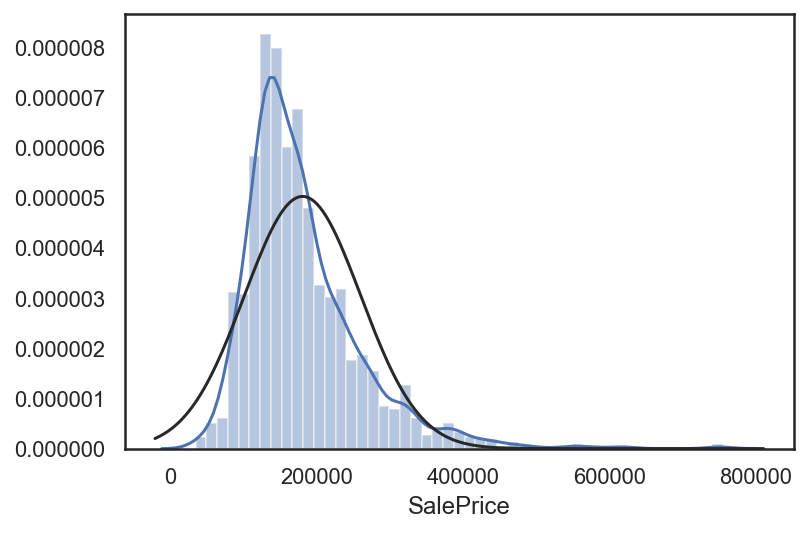

In [7]:
# Plot Histogram
from scipy.stats import norm
sns.distplot(train['SalePrice'],fit=norm)

In [8]:
# Checking Categorical Data
train.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [9]:
# Checking Numerical Data
train.select_dtypes(include=['int64','float64']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [10]:
cat=len(train.select_dtypes(include=['object']).columns)
num=len(train.select_dtypes(include=['int64','float64']).columns)
print('Total Fetures:', cat,'catagorical',\
      '+',num,'numerical','=',cat+num,'features')

Total Fetures: 43 catagorical + 37 numerical = 80 features


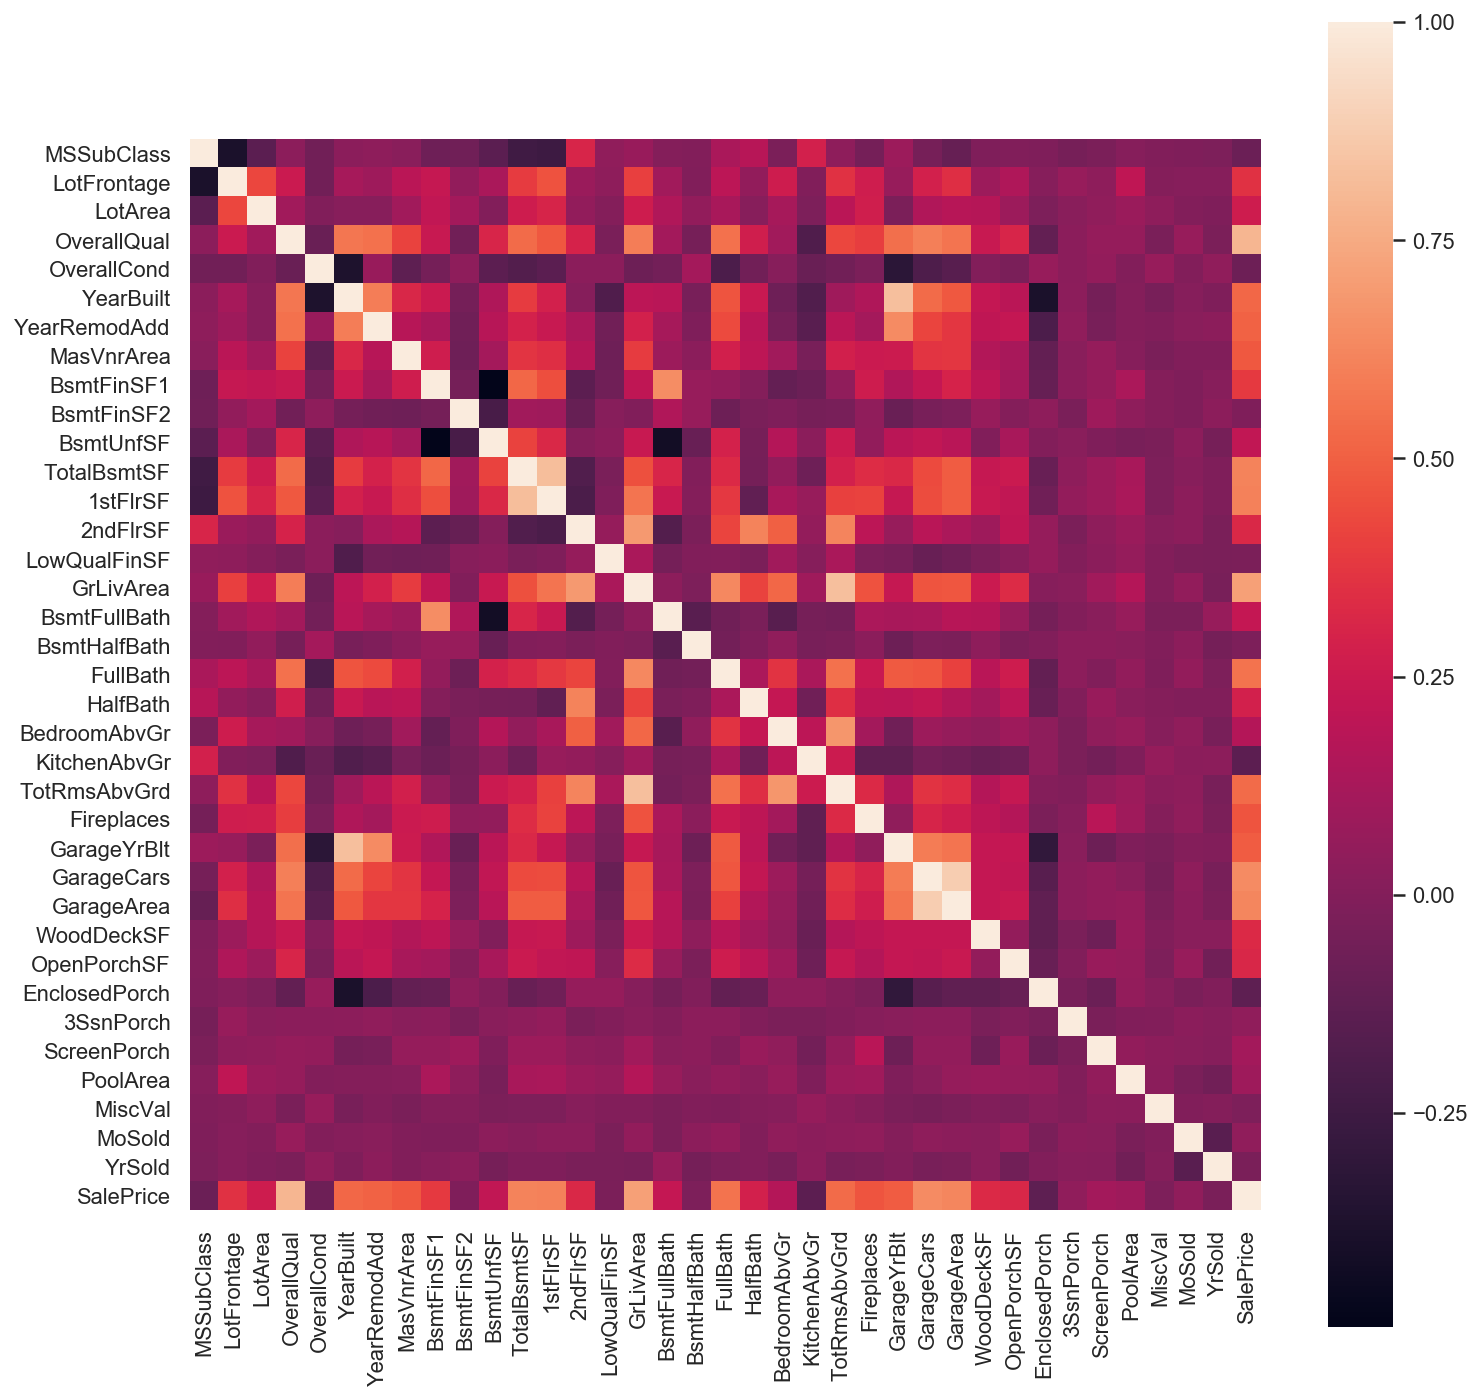

In [11]:
#Correlation Matrix Heatmap
corrmat=train.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corrmat,square=True)

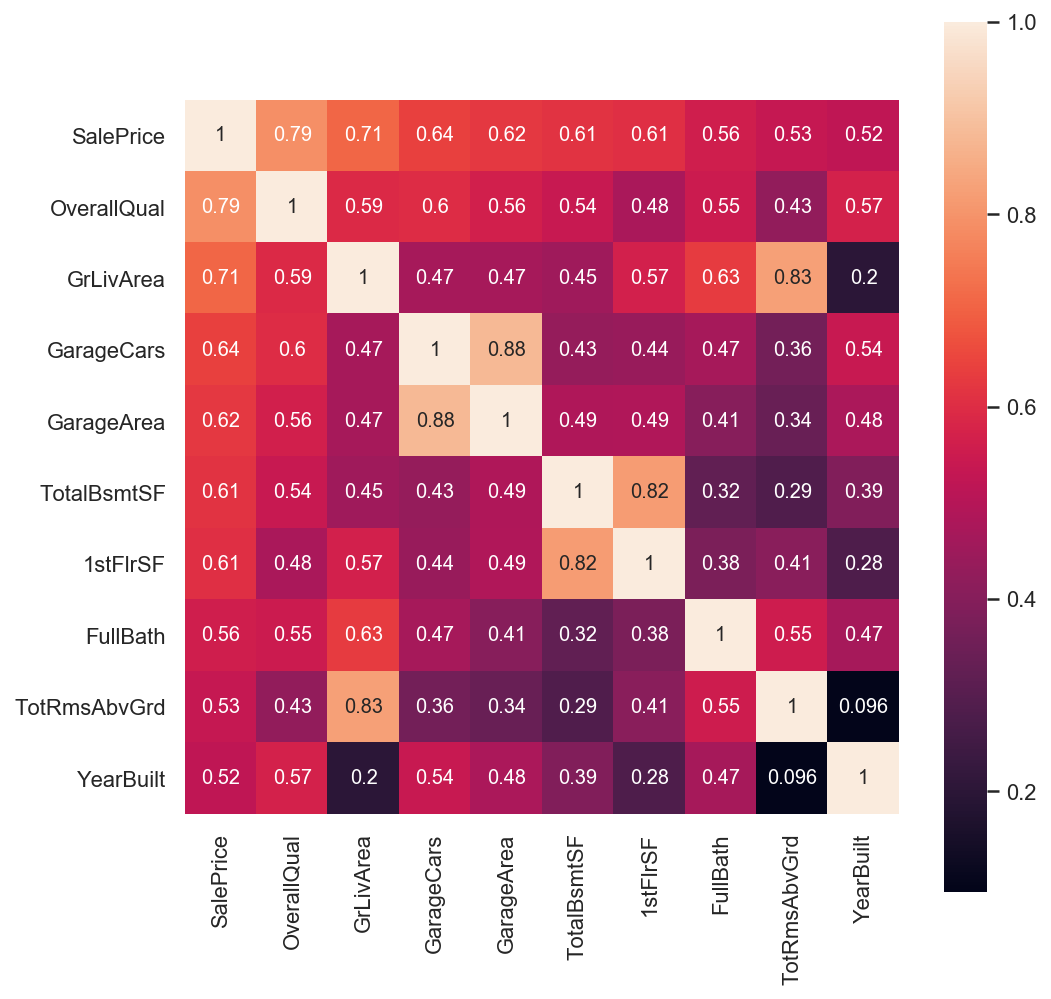

In [12]:
#Top 10 Heatmap
k=10
cols=corrmat.nlargest(k,'SalePrice')['SalePrice'].index
a=train[cols].corr()
plt.figure(figsize=(8,8))
sns.heatmap(a,square=True,annot=True)

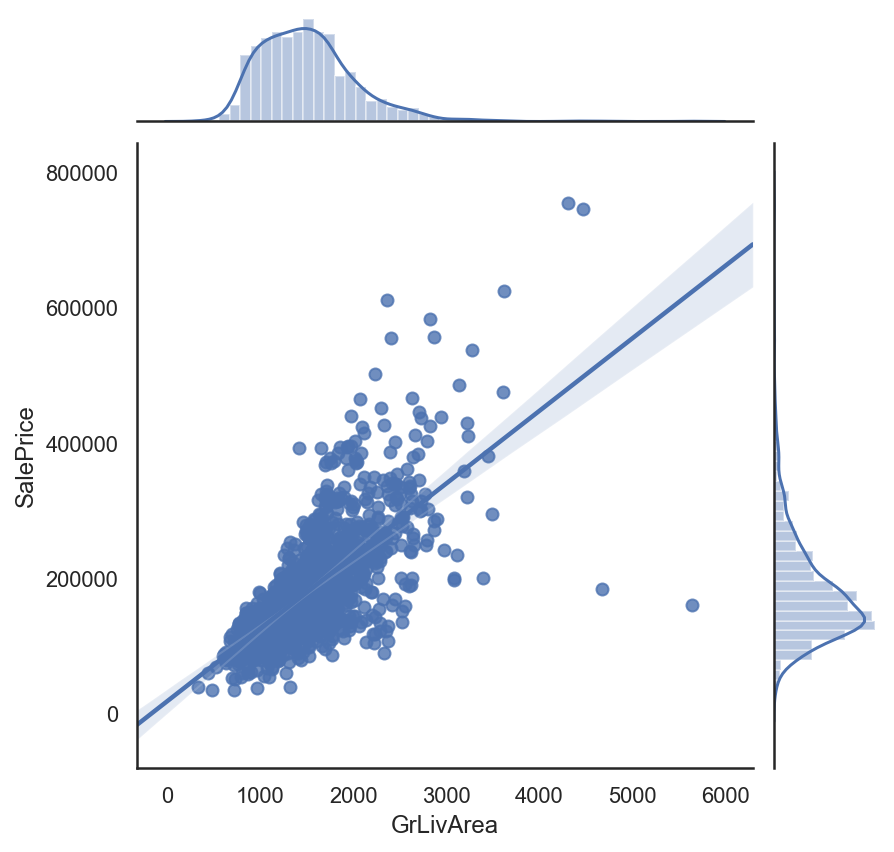

In [13]:
# Living Area vs Sale Price
sns.jointplot(x=train['GrLivArea'], y=train['SalePrice'], kind='reg')

In [14]:
# Removing outliers manually (Two points in the bottom right)
train=train.drop(train[(train['GrLivArea']>4000)\
        &(train['SalePrice']<300000)].index).reset_index(drop=True)

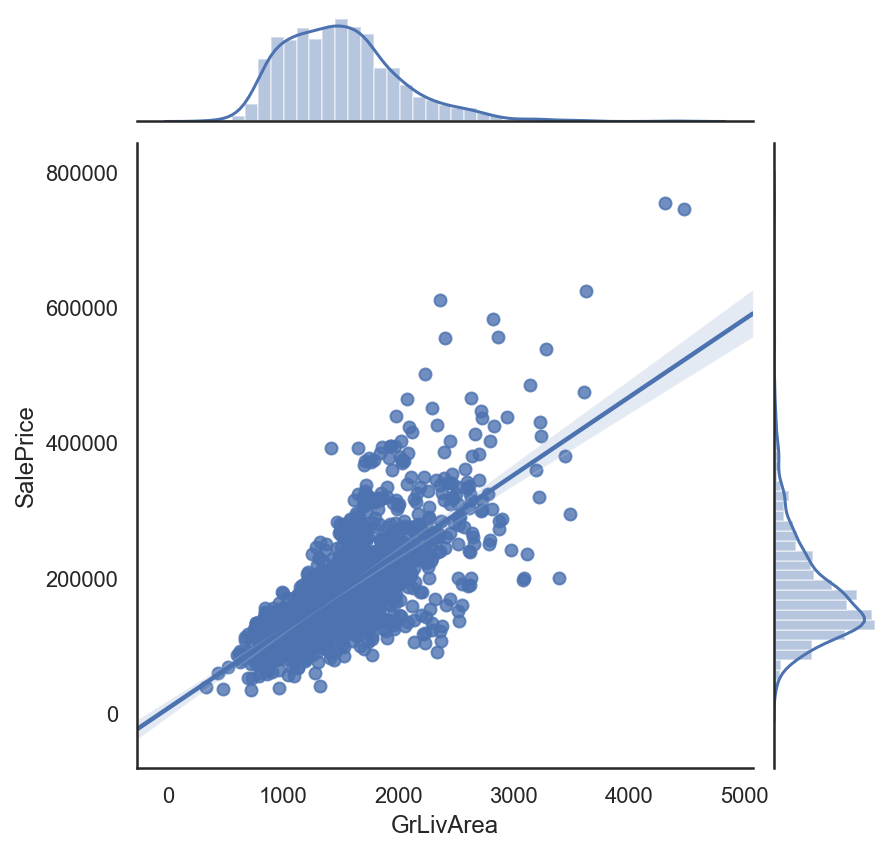

In [15]:
# Living Area vs Sale Price
sns.jointplot(x=train['GrLivArea'], y=train['SalePrice'], kind='reg')

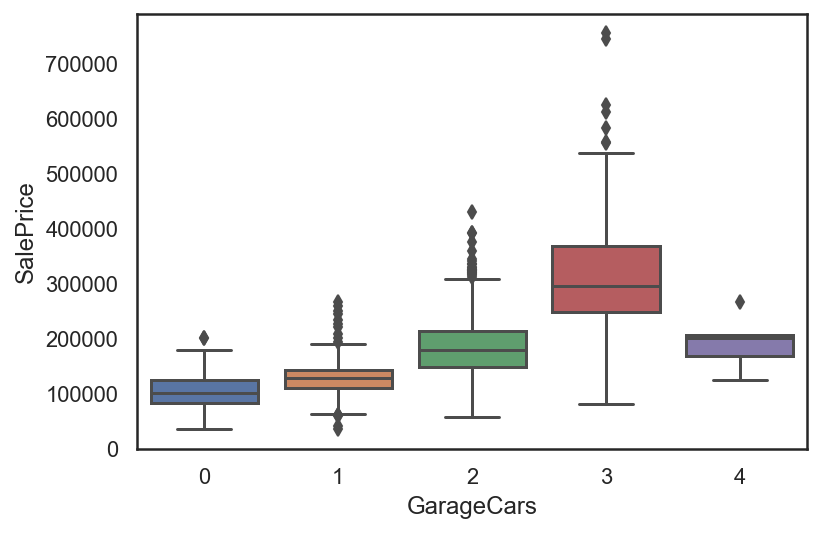

In [16]:
# Garage Cars vs Sale Price
sns.boxplot(x=train['GarageCars'], y=train['SalePrice'])

In [17]:
# Removing outliers manually (4-cars)
train=train.drop(train[train['GarageCars']==4].index).reset_index(drop=True)

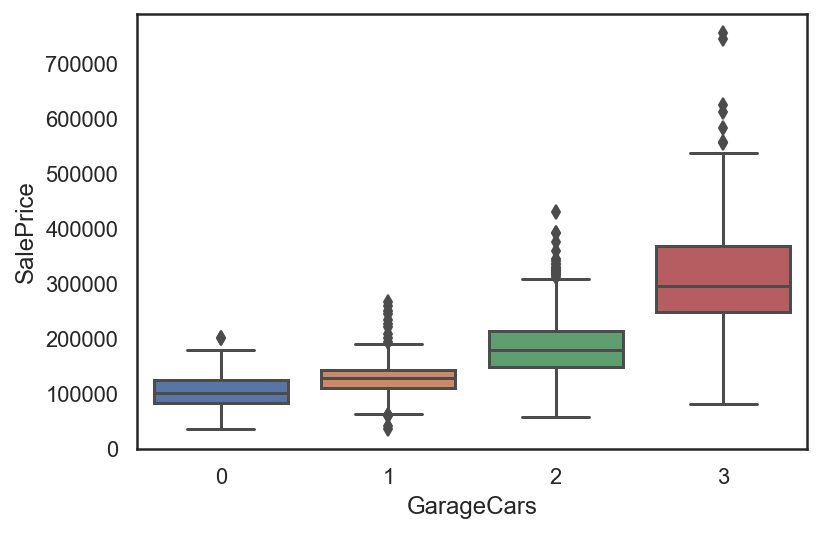

In [18]:
# Garage Cars vs Sale Price
sns.boxplot(x=train['GarageCars'], y=train['SalePrice'])

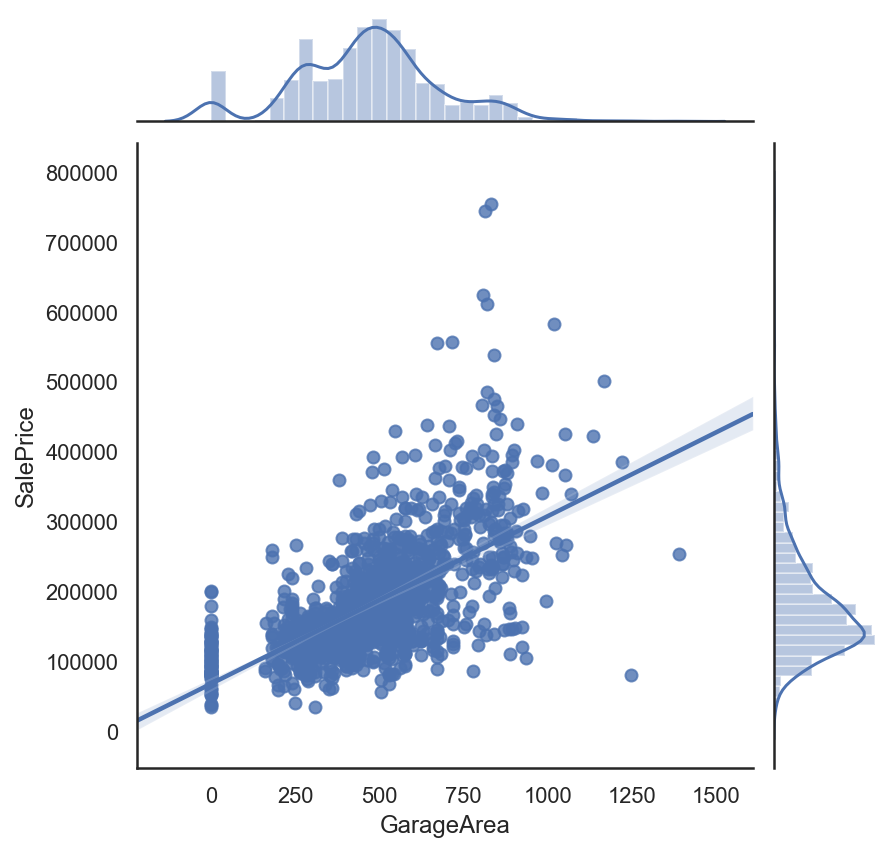

In [19]:
# Garage Area vs Sale Price
sns.jointplot(x=train['GarageArea'], y=train['SalePrice'], kind='reg')

In [20]:
# Removing outliers manually (More than 1000 sqft, less than $300k)
train = train.drop(train[(train['GarageArea']>1000)\
        & (train['SalePrice']<300000)].index).reset_index(drop=True)

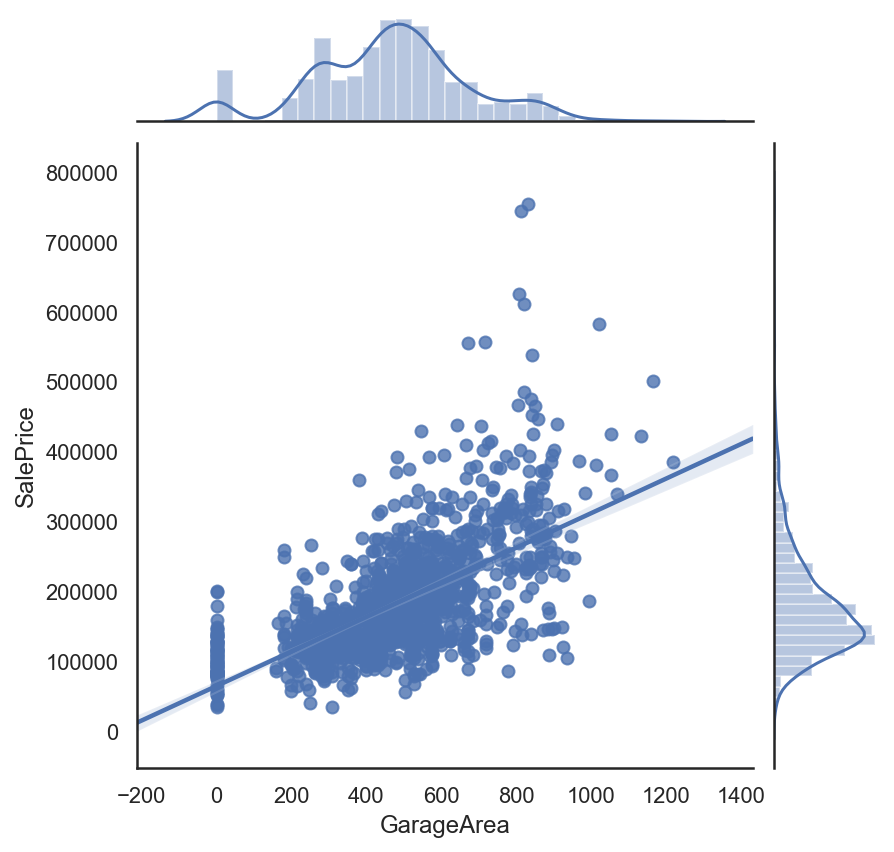

In [21]:
# Garage Area vs Sale Price
sns.jointplot(x=train['GarageArea'], y=train['SalePrice'], kind='reg')

2. Impute Missing Data and Clean Data

In [22]:
# Combining Datasets
ntrain=train.shape[0]
ntest=test.shape[0]
y_train=train.SalePrice.values
all_data=pd.concat((train,test)).reset_index(drop=True)
all_data.drop(['SalePrice'],axis=1,inplace=True)
print("Train data size is : {}".format(train.shape))
print("Test data size is : {}".format(test.shape))
print("Combined dataset size is : {}".format(all_data.shape))

Train data size is : (1448, 80)
Test data size is : (1459, 79)
Combined dataset size is : (2907, 79)


In [23]:
# Find Missing Ratio of Dataset
all_data_na=(all_data.isnull().sum()/len(all_data))*100
all_data_na=all_data_na.drop(all_data_na[all_data_na==0].index).\
      sort_values(ascending=False)
missing_data=pd.DataFrame({'Missing Ratio': all_data_na})
missing_data

,Missing Ratio
PoolQC,99.690402
MiscFeature,96.422429
Alley,93.223254
Fence,80.392157
FireplaceQu,48.710010
LotFrontage,16.683867
GarageQual,5.469556
GarageCond,5.469556
GarageFinish,5.469556
GarageYrBlt,5.469556


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text xticklabel objects>)

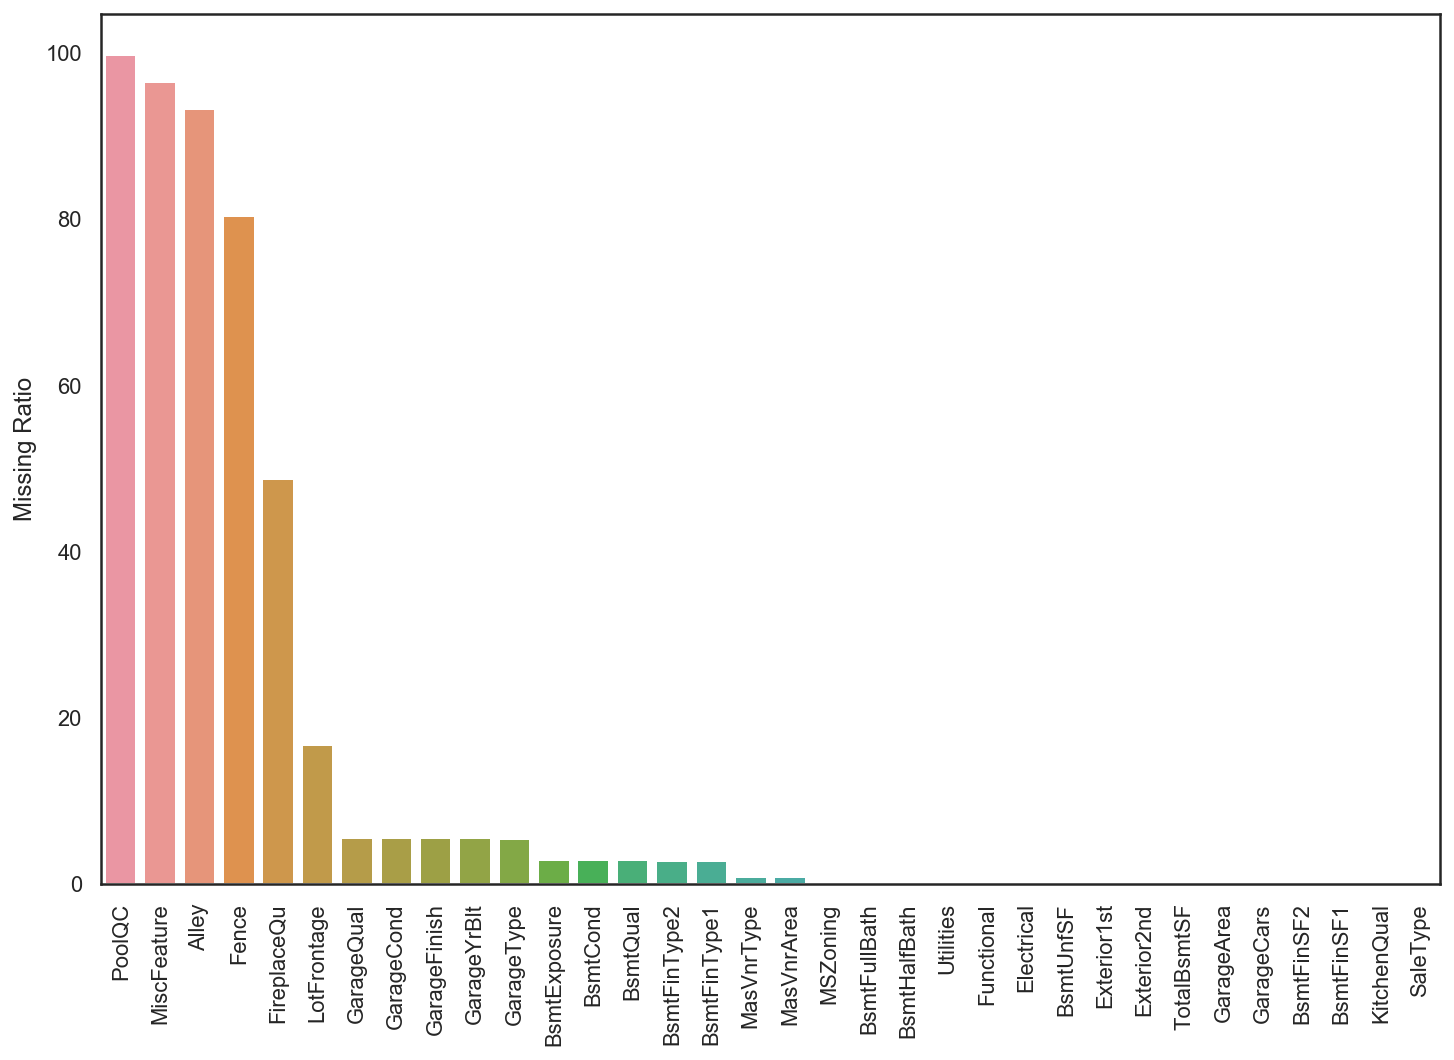

In [24]:
#Percent missing data by feature
plt.figure(figsize=(12,8))
sns.barplot(x=missing_data.index,y=missing_data['Missing Ratio'])
plt.xticks(rotation='90')

In [25]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data = all_data.drop(['Utilities'], axis=1)
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [26]:
# Check if there are any missing values left
all_data_na=all_data.isnull().sum()
all_data_na=all_data_na.drop(all_data_na[all_data_na==0].index)
all_data_na

Series([], dtype: int64)

## 2. Feature Engineering

In [27]:
all_data['MSSubClass'].describe()

count    2907.000000
mean       57.094943
std        42.510238
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64

In [28]:
#MSSubClass =The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [29]:
all_data['KitchenQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [30]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# Process columns and apply LabelEncoder to categorical features
for c in cols:
    lbl=LabelEncoder()
    lbl.fit(list(all_data[c].values))
    all_data[c]=lbl.transform(list(all_data[c].values))
# Check shape 
all_data.shape

(2907, 78)

In [31]:
# Adding Total Square Feet feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

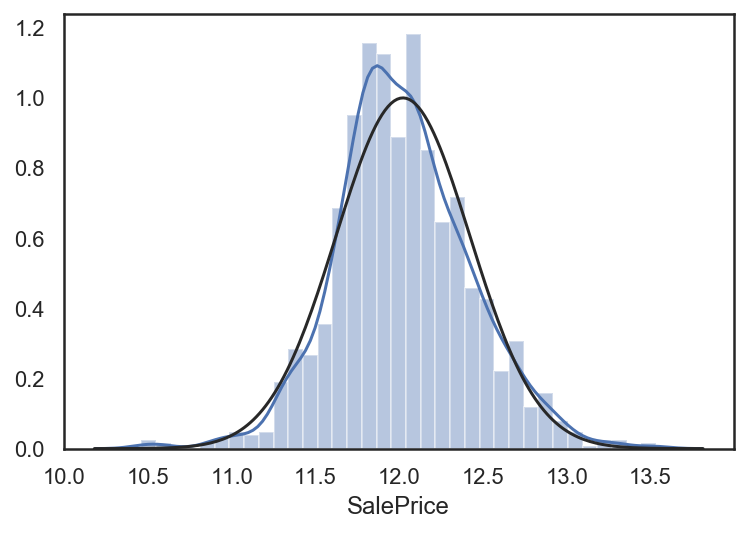

In [32]:
# We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

In [33]:
y_train=train.SalePrice.values

In [40]:
numeric_feats=all_data.dtypes[all_data.dtypes !='object'].index
from scipy.stats import skew
# check the skew of all numeric features
skewed_feats=all_data[numeric_feats].apply(lambda x: skew(x))\
.sort_values(ascending=False)
skewness=pd.DataFrame({'Skewed Features':skewed_feats})
skewness.head()


,Skewed Features
MiscVal,21.911765
PoolArea,17.658029
LotArea,13.147728
LowQualFinSF,12.063406
3SsnPorch,11.352135


In [43]:
skewness=skewness[abs(skewness)>0.75]
print("There are {} skewed numerical features to Box Cox transform".
      format(skewness.shape[0]))
from scipy.special import boxcox1p
skewed_features=skewness.index
lam=0.15
for feat in skewed_features:
    all_data[feat]=boxcox1p(all_data[feat],lam)
    all_data[feat]+=1

There are 59 skewed numerical features to Box Cox transform


In [44]:
all_data=pd.get_dummies(all_data)
all_data.shape

(2907, 220)

In [45]:
train=all_data[:ntrain]
test=all_data[ntrain:]

## 3. Modeling and Predictions

In [46]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [47]:
# cross-validation with 5 folds
def rmse_cv(model):
    rmse=np.sqrt(-cross_val_score(model,train.values, y_train,\
                                  scoring='neg_mean_squared_error', cv=5))
    return rmse

In [60]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
model_xgb = xgb.XGBRegressor(colsample_bytree=0.2, gamma=0.0, 
                             learning_rate=0.05, max_depth=6, 
                             min_child_weight=1.5, n_estimators=7200,
                             reg_alpha=0.9, reg_lambda=0.6,
                             subsample=0.2,seed=42, silent=1,
                             random_state =7)
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)


In [49]:
score = rmse_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmse_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmse_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmse_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmse_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmse_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))


Lasso score: 0.1111 (0.0071)

ElasticNet score: 0.1111 (0.0072)

Kernel Ridge score: 0.1148 (0.0075)

Gradient Boosting score: 0.1173 (0.0079)

Xgboost score: 0.1176 (0.0058)

LGBM score: 0.1148 (0.0064)



In [64]:
class AverageModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models=models
    
    def fit(self, X, y):
        self.models_=[clone(x) for x in self.models]
        for model in self.models_:
            model.fit(X,y)
        return self
    
    def predict(self, X):
        predictions=np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)

In [65]:
# average ENet, GBoost, KRR and lasso
averaged_models=AverageModels(models=(ENet, GBoost, KRR, lasso))
score=rmse_cv(averaged_models)
print("Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Averaged base models score: 0.1085 (0.0073)



In [73]:
class StackingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model):
        self.base_models=base_models
        self.meta_model=meta_model
        self.n_folds=5
    def fit(self, X, y):
        self.base_models_=[list() for x in self.base_models]
        self.meta_model_=clone(self.meta_model)
        kfold=KFold(n_splits=self.n_folds,shuffle=True)
        out_of_fold_predictions=np.zeros((X.shape[0],len(self.base_models)))
        for i, clf in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(clf)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)
        
        

In [74]:
stacked_models=StackingModels(base_models = (ENet, GBoost, KRR),meta_model = lasso)
score=rmse_cv(stacked_models)
print("Stacking models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking models score: 0.1077 (0.0072)


In [75]:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y,y_pred))

In [77]:
stacked_models.fit(train.values, y_train)
stacked_train_pred=stacked_models.predict(train.values)
stacked_pred=np.expm1(stacked_models.predict(test.values))
print(rmse(y_train, stacked_train_pred))

0.07749012951972269


In [78]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmse(y_train, xgb_train_pred))

0.04198698554766985


In [79]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmse(y_train, lgb_train_pred))

0.07127683177891941


In [80]:
Stacked = 1/(0.0775)
XGBoost = 1/(0.0420)
LGBM = 1/(0.0713)
Sum = Stacked + XGBoost + LGBM
Stacked = Stacked/Sum
XGBoost = XGBoost/Sum
LGBM = LGBM/Sum
print(Stacked, XGBoost, LGBM)

0.2543109122021851 0.46926418323022245 0.2764249045675925


In [82]:
print('RMSE score on train data:')
print(rmse(y_train,stacked_train_pred*Stacked +
               xgb_train_pred*XGBoost + lgb_train_pred*LGBM))

RMSE score on train data:
0.05624847084878522


In [83]:
ensemble=stacked_pred*Stacked + xgb_pred*XGBoost + lgb_pred*LGBM

In [84]:
sub2 = pd.DataFrame()
sub2['Id'] = test_ID
sub2['SalePrice'] = ensemble
sub2.to_csv('submission2.csv',index=False)